In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Team 4
## Real Estate Score Card

The data we are analyzing is related to real estate prices from Zillow. The data is in the form of a CSV file, containing the following columns:
- **RegionID**: Unique identifier for the region
- **SizeRank**: Rank of the region based on size
- **RegionName**: Name of the region
- **RegionType**: Type of the region: neighborhood
- **StateName**: Name of the state
- **State**: Abbreviation of the state
- **City**
- **Metro**
- **CountyName**
- **Series of Dates from 2000-01 to 2024-09**, incremented per month

The values associated we are looking at is called the Zillow Home Value Index (ZHVI).

**Zillow Home Value Index (ZHVI)**: A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. More info about ZHVI: [Zillow Research](https://www.zillow.com/research/methodology-neural-zhvi-32128/)

Our analysis will be focused on the Chicago land area consisting of all its neighborhoods and regions associated.


In [53]:
# Read in the file
df = pd.read_csv('Neighborhood_zillow.csv')

# check the shape of the data
print("shape:", df.shape)



shape: (21628, 306)


In [ ]:
# Clean the data to only include chicago neighborhoods
chicago_df = df[df['City'] == 'Chicago']

# List the neighborhoods
print("Neighborhoods in Chicago:")
print(chicago_df['RegionName'].unique())

# Remove the columns that are not needed
chicago_df = chicago_df.drop(columns=['StateName', 'Metro', 'CountyName'])

print("Columns:")
print(chicago_df.columns.to_list())

# Save the df into a csv for chicago
chicago_df.to_csv('Chicago_Neighborhoods.csv', index=False)




In [ ]:
# Filter regions into unique dataframes

# North Side
north_side_regions = [
    'Rogers Park', 'Edgewater', 'Uptown', 'Lake View', 'Lincoln Park', 
    'North Center', 'Lincoln Square', 'West Ridge', 'Irving Park', 
    'Albany Park', 'Avondale'
]
north_side_df = chicago_df[chicago_df['RegionName'].isin(north_side_regions)]

# South Side
south_side_regions = [
    'Armour Square', 'Bridgeport', 'Brighton Park', 'New City (Back of the Yards)', 
    'Englewood', 'Greater Grand Crossing', 'Hyde Park', 'Kenwood', 'Oakland', 
    'South Shore', 'Washington Park', 'Woodlawn', 'Chatham', 'South Chicago', 
    'Auburn Gresham', 'Calumet Heights', 'Roseland', 'Pullman', 'West Pullman', 
    'Riverdale'
]
south_side_df = chicago_df[chicago_df['RegionName'].isin(south_side_regions)]

# East Side
east_side_regions = [
    'Hegewisch', 'East Side', 'South Shore', 'Hyde Park', 'Kenwood'
    
]
east_side_df = chicago_df[chicago_df['RegionName'].isin(east_side_regions)]

# West Side
west_side_regions = [
    'Austin', 'East Garfield Park', 'West Garfield Park', 'North Lawndale', 
    'South Lawndale (Little Village)', 'Humboldt Park', 'Near West Side', 'West Town'
]
west_side_df = chicago_df[chicago_df['RegionName'].isin(west_side_regions)]

# Northwest Side
northwest_side_regions = [
    'Jefferson Park', 'Portage Park', 'Norwood Park', 'Dunning', 'Belmont Cragin', 
    'Montclare', 'Irving Park', 'Hermosa'
]
northwest_side_df = chicago_df[chicago_df['RegionName'].isin(northwest_side_regions)]

# Southwest Side
southwest_side_regions = [
    'Garfield Ridge', 'Archer Heights', 'Brighton Park', 'Gage Park', 'West Elsdon', 
    'West Lawn', 'Chicago Lawn (Marquette Park)', 'Ashburn', 'Clearing'
]
southwest_side_df = chicago_df[chicago_df['RegionName'].isin(southwest_side_regions)]

print("North Side neighborhoods: \n", north_side_df.head())
print("South Side neighborhoods: \n", south_side_df.head())
print("East Side neighborhoods: \n", east_side_df.head())
print("West Side neighborhoods: \n", west_side_df.head())
print("Northwest Side neighborhoods: \n", northwest_side_df.head())
print("Southwest Side neighborhoods: \n", southwest_side_df.head())

In [ ]:
# Unpivot date columns so data is more rectangular
def reshape_dates(df):
    # Identify date columns 
    date_columns = [col for col in df.columns if col.startswith('20')]
    
    # Melt dataframe to convert date columns into rows
    df_melted = df.melt(id_vars=['RegionID', 'SizeRank', 'RegionName'],
                        value_vars=date_columns,
                        var_name='Date', value_name='ZHVI')
    
    # Convert Date to datetime fromat
    df_melted['Date'] = pd.to_datetime(df_melted['Date'])

    return df_melted

reshaped_df = reshape_dates(chicago_df)
reshaped_df.head()


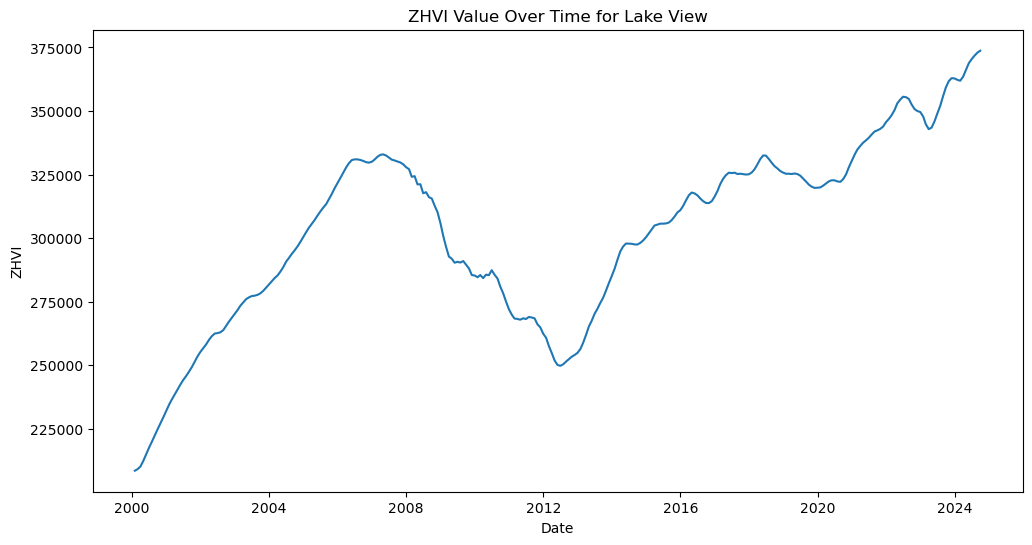

In [65]:
# Filter for Lake View
lake_view_df = reshaped_df[reshaped_df['RegionName'] == 'Lake View']

# Plot ZHVI over time for Lake View
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ZHVI', data=lake_view_df)
plt.title("ZHVI Value Over Time for Lake View")
plt.xlabel("Date")
plt.ylabel("ZHVI")
plt.show()

In [ ]:
pd.read_csv('Chicago_ZIP_Populations_2010.csv')

In [ ]:
# Clean up populations csv's
def clean_population(year):
    filename = 'Chicago_ZIP_Populations_' + str(year) + '.csv'
    df = pd.read_csv(filename)

    # Transpose columns and rows
    df = df.set_index('Label (Grouping)').transpose().reset_index()

    # Rename columns
    df.columns = ['Zip Code', 'Total']

    # Remove prefix from Zip codes
    df['Zip Code'] = df['Zip Code'].str[6:]
    df['Year'] = year
    
    return df

pop_2010 = clean_population(2010)
pop_2020 = clean_population(2020)

# Combine both years into one dataframe
population_df = pd.concat([pop_2010, pop_2020], ignore_index=True)

population_df

In [ ]:
# north side 

reshaped_north_side_df = reshape_dates(north_side_df)

# print ("North Side neighborhoods: \n", reshaped_north_side_df["RegionName"].unique())
# print ("North Side neighborhoods: \n", reshaped_north_side_df.columns)

# Ensure Date column is in datetime format
reshaped_north_side_df['Date'] = pd.to_datetime(reshaped_north_side_df['Date'])

# Plot ZHVI over time for Lake View
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ZHVI', data=reshaped_north_side_df)
plt.title("ZHVI Value Over Time for North Side (Combined)")
plt.xlabel("Date")
plt.ylabel("ZHVI")
plt.show()

# 1. ZHVI Over Time for North Side - Line Graph
plt.figure(figsize=(14, 8))
sns.lineplot(data=reshaped_north_side_df, x='Date', y='ZHVI', hue='RegionName')
plt.title('ZHVI Over Time for North Side Regions')
plt.xlabel('Date')
plt.ylabel('ZHVI')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Average ZHVI by Region - Bar Chart
average_zhvi_by_region = reshaped_north_side_df.groupby('RegionName')['ZHVI'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_zhvi_by_region, x='RegionName', y='ZHVI', palette='viridis')
plt.title('Average ZHVI by Region')
plt.xlabel('Region')
plt.ylabel('Average ZHVI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. ZHVI Distribution by Region - Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=reshaped_north_side_df, x='RegionName', y='ZHVI', palette='pastel')
plt.title('ZHVI Distribution by Region')
plt.xlabel('Region')
plt.ylabel('ZHVI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

# Create region mapping
region_mapping = {}

# North Side
for neighborhood in north_side_regions:
    region_mapping[neighborhood] = 'North Side'

# South Side
for neighborhood in south_side_regions:
    region_mapping[neighborhood] = 'South Side'

# East Side
for neighborhood in east_side_regions:
    region_mapping[neighborhood] = 'East Side'

# West Side
for neighborhood in west_side_regions:
    region_mapping[neighborhood] = 'West Side'

# Northwest Side
for neighborhood in northwest_side_regions:
    region_mapping[neighborhood] = 'Northwest Side'

# Southwest Side
for neighborhood in southwest_side_regions:
    region_mapping[neighborhood] = 'Southwest Side'

# Add 'Region' column to reshaped_df
reshaped_df['Region'] = reshaped_df['RegionName'].map(region_mapping)

# Filter out rows where 'Region' is NaN
reshaped_df = reshaped_df[~reshaped_df['Region'].isna()]

# Group by 'Date' and 'Region' and compute average ZHVI
grouped = reshaped_df.groupby(['Date', 'Region'])['ZHVI'].mean().reset_index()

# Plot average ZHVI over time for each region
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped, x='Date', y='ZHVI', hue='Region')
plt.title('Average ZHVI Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Average ZHVI')
plt.legend(title='Region')
plt.show()


In [ ]:
# Get the latest date in the data
latest_date = reshaped_df['Date'].max()

# List of regions
regions = ['North Side', 'South Side', 'East Side', 'West Side', 'Northwest Side', 'Southwest Side']

for region in regions:
    # Filter data for the region and latest date
    region_df = reshaped_df[(reshaped_df['Region'] == region) & (reshaped_df['Date'] == latest_date)]
    
    # Group by 'RegionName' and get the ZHVI
    neighborhood_zhvi = region_df[['RegionName', 'ZHVI']].sort_values(by='ZHVI', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=neighborhood_zhvi, x='ZHVI', y='RegionName', palette='viridis')
    plt.title(f'ZHVI for Neighborhoods in {region} as of {latest_date.date()}')
    plt.xlabel('ZHVI')
    plt.ylabel('Neighborhood')
    plt.tight_layout()
    plt.show()
